In [2]:
library(GLMsData)
library(MASS)
data(wheatrain)

In [3]:
str(wheatrain)

'data.frame':	24 obs. of  6 variables:
 $ Station: Factor w/ 24 levels "Bardine","Barraba",..: 11 4 6 10 16 20 23 21 1 14 ...
 $ Alt    : num  216 199 180 278 177 ...
 $ Lat    : num  28.5 33.1 31 31.7 31.6 ...
 $ Lon    : num  150 147 148 149 147 ...
 $ AR     : int  529 447 505 563 440 518 492 483 585 569 ...
 $ Region : int  3 1 1 2 1 1 1 1 3 3 ...


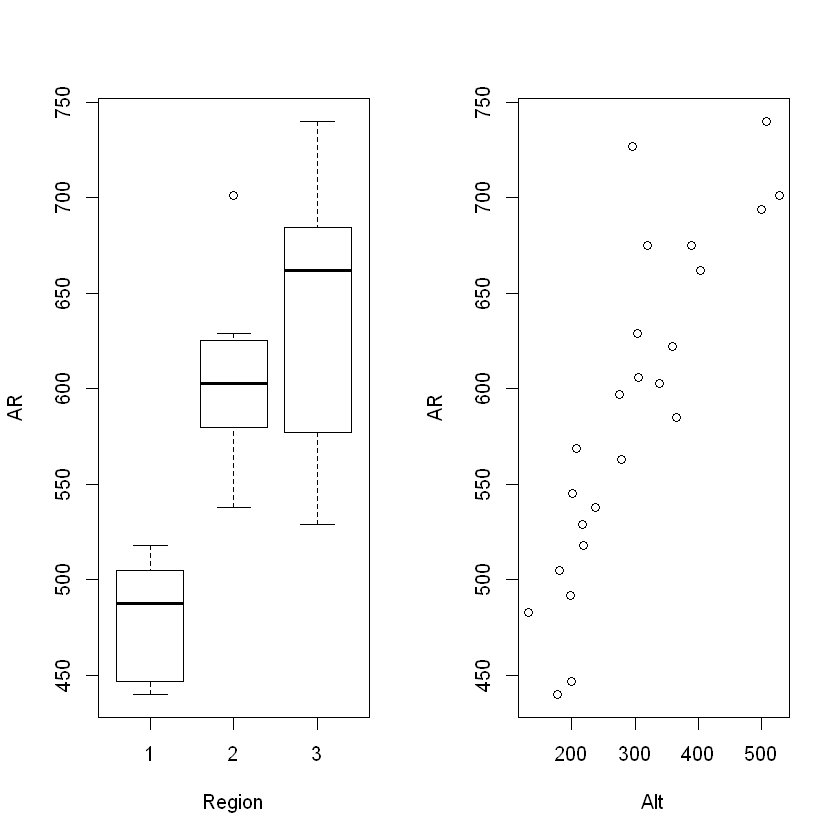

In [5]:
par(mfrow=c(1, 2))
boxplot(AR ~ Region, data=wheatrain)
plot(AR ~ Alt, data=wheatrain)

In [6]:
lm.1 <- lm(AR ~ Region*Alt, data=wheatrain)

In [7]:
coef(summary(lm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),332.52429353,68.8263789,4.8313495,0.0001013849
Region,45.36876751,30.1454349,1.5049963,0.1479549921
Alt,0.61301883,0.2974148,2.0611577,0.0525299411
Region:Alt,-0.03653997,0.1170245,-0.3122421,0.7580886394


In [8]:
anova(lm.1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Region,1,86532.7686,86532.7686,55.7916992,3.309597e-07
Alt,1,55401.6980,55401.6980,35.7200506,7.625270e-06
Region:Alt,1,151.2146,151.2146,0.0974951,7.580886e-01
Residuals,20,31019.9437,1550.9972,NA,NA


In [9]:
extractAIC(lm.1)

[1]   4.000 179.944

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"pseudoinverse used at 3.01"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"neighborhood radius 1.01"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"reciprocal condition number  0"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"There are other near singularities as well. 1"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"pseudoinverse used at 3.01"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"neighborhood radius 1.01"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"reciprocal condition number  0"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"There are other near singularities as well. 1"Warning message in simpleLoess(y, x, w, span, degree =

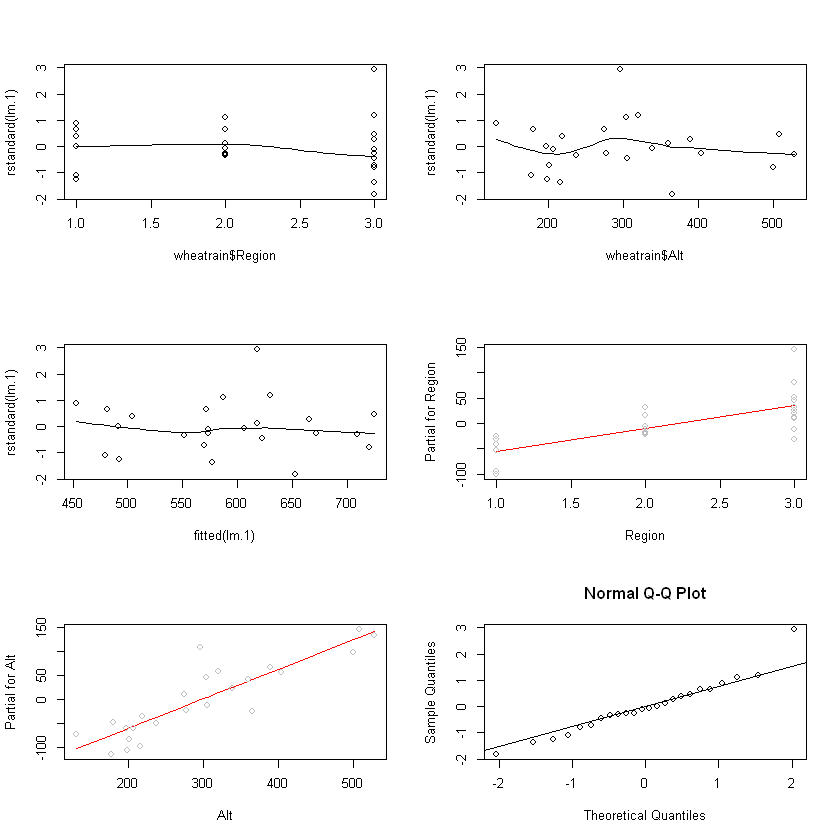

In [15]:
par(mfrow=c(3, 2))
scatter.smooth(rstandard(lm.1) ~ wheatrain$Region)
scatter.smooth(rstandard(lm.1) ~ wheatrain$Alt)
scatter.smooth(rstandard(lm.1) ~ fitted(lm.1))
termplot(lm.1, partial.resid = TRUE, terms="Region")
termplot(lm.1, partial.resid = TRUE, terms="Alt")
termplot(lm.1, partial.resid = TRUE, terms="Region:Alt")
qqnorm(rstandard(lm.1))
qqline(rstandard(lm.1))

In [16]:
rstandard(lm.1)

1           2           3           4           5           6 
-1.36723300 -1.24754032  0.64635755 -0.27253416 -1.10894968  0.37808823 
          7           8           9          10          11          12 
 0.01479838  0.89178688 -1.81231085 -0.11382755 -0.71450361 -0.80317019 
         13          14          15          16          17          18 
 2.92266514  1.20400179 -0.44430019  0.27075945 -0.27186093  0.11934339 
         19          20          21          22          23          24 
 0.47012681  0.66371755 -0.34728321 -0.30440478 -0.08897778  1.10159198

In [17]:
rstudent(lm.1)

1           2           3           4           5           6 
-1.39962715 -1.26621669  0.63667624 -0.26612807 -1.11571644  0.36983891 
          7           8           9          10          11          12 
 0.01442376  0.88702106 -1.93218819 -0.11098133 -0.70547406 -0.79577211 
         13          14          15          16          17          18 
 3.76357793  1.21850560 -0.43520335  0.26438868 -0.26546821  0.11636299 
         19          20          21          22          23          24 
 0.46077601  0.65415619 -0.33951503 -0.29738680 -0.08674198  1.10783398

In [18]:
hatvalues(lm.1)

1          2          3          4          5          6          7 
0.19320716 0.13812399 0.15923868 0.06744969 0.16408906 0.13382015 0.13956537 
         8          9         10         11         12         13         14 
0.29025202 0.09564662 0.20969890 0.22238266 0.30708919 0.09723590 0.08802875 
        15         16         17         18         19         20         21 
0.09230112 0.11280284 0.12698485 0.13940385 0.33138867 0.06649564 0.06466584 
        22         23         24 
0.56690309 0.11254497 0.08068098

In [19]:
rowSums(influence.measures(lm.1)$is.inf)

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 
 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  2  0  0

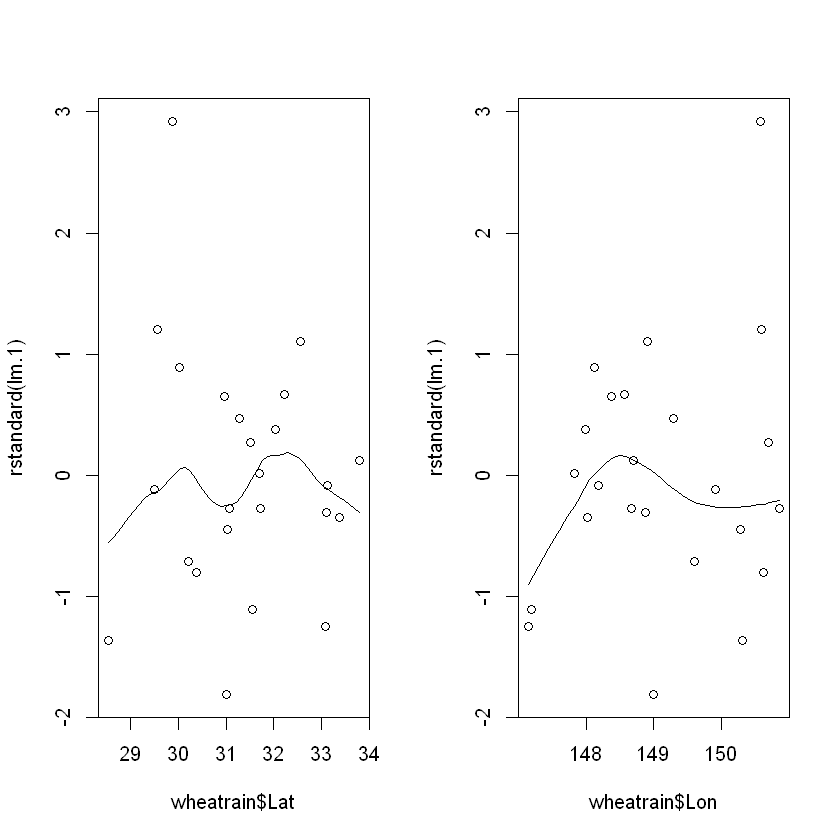

In [21]:
par(mfrow=c(1, 2))
scatter.smooth(rstandard(lm.1) ~ wheatrain$Lat)
scatter.smooth(rstandard(lm.1) ~ wheatrain$Lon)